In [3]:
# Load the traffic flow counts data and explore its structure
import pandas as pd
import numpy as np

# Install required visualization packages
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the data
df = pd.read_csv('2022 Traffic Flow Counts.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("Column Names and Types:")
print(df.dtypes)
print("\n" + "="*80)
print("First few rows:")
print(df.head())
print("\n" + "="*80)
print("Basic Statistics:")
print(df.describe())
print("\n" + "="*80)
print("Missing Values:")
print(df.isnull().sum())

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.2 MB/s  0:00:00 eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl (270 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.2 MB/s  0:00:00 eta 0:00:01
Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.3 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]
Dataset Shape: (1930, 31)

Column Names and Types:
FID                int64
OBJECTID           int64
COMPKEY             

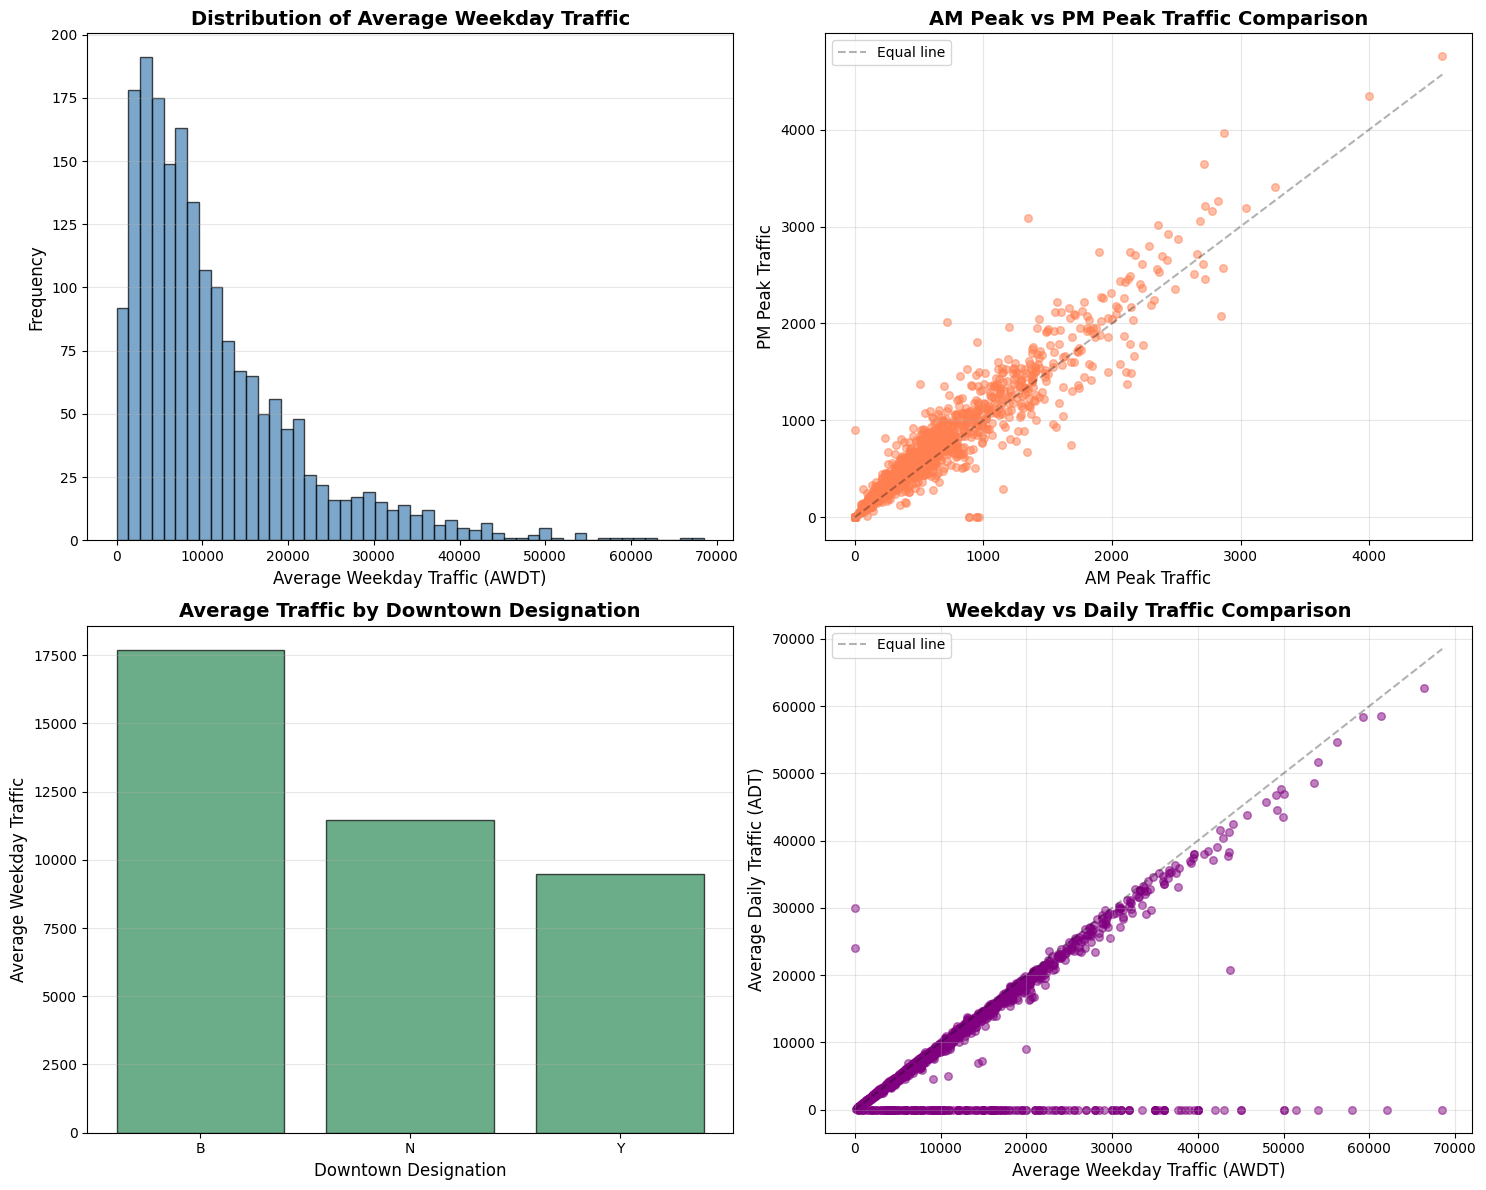


KEY TRAFFIC STATISTICS

Average Weekday Traffic (AWDT):
  Mean: 11,303 vehicles
  Median: 8,379 vehicles
  Max: 68,500 vehicles
  Min: 0 vehicles

AM Peak Traffic (AMPK):
  Mean: 451 vehicles
  Median: 269 vehicles

PM Peak Traffic (PMPK):
  Mean: 504 vehicles
  Median: 331 vehicles

Peak Hour Analysis (excluding zero values):
  AM Peak as % of daily traffic: 7.2%
  PM Peak as % of daily traffic: 8.4%
  PM/AM Peak Ratio: 1.12


In [4]:
# Analyze key traffic metrics and create visualizations
# Focus on AMPK (AM Peak), PMPK (PM Peak), AWDT (Average Weekday Traffic), and ADT (Average Daily Traffic)

# Create a figure with multiple subplots for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Average Weekday Traffic (AWDT)
axes[0, 0].hist(df['AWDT'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Average Weekday Traffic (AWDT)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Average Weekday Traffic', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. AM Peak vs PM Peak Traffic
axes[0, 1].scatter(df['AMPK'], df['PMPK'], alpha=0.5, color='coral', s=30)
axes[0, 1].plot([0, df['AMPK'].max()], [0, df['AMPK'].max()], 'k--', alpha=0.3, label='Equal line')
axes[0, 1].set_xlabel('AM Peak Traffic', fontsize=12)
axes[0, 1].set_ylabel('PM Peak Traffic', fontsize=12)
axes[0, 1].set_title('AM Peak vs PM Peak Traffic Comparison', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Traffic by Downtown designation
downtown_traffic = df.groupby('DOWNTOWN')['AWDT'].mean().sort_values(ascending=False)
axes[1, 0].bar(downtown_traffic.index, downtown_traffic.values, color='seagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Downtown Designation', fontsize=12)
axes[1, 0].set_ylabel('Average Weekday Traffic', fontsize=12)
axes[1, 0].set_title('Average Traffic by Downtown Designation', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. AWDT vs ADT comparison
axes[1, 1].scatter(df['AWDT'], df['ADT'], alpha=0.5, color='purple', s=30)
axes[1, 1].plot([0, df['AWDT'].max()], [0, df['AWDT'].max()], 'k--', alpha=0.3, label='Equal line')
axes[1, 1].set_xlabel('Average Weekday Traffic (AWDT)', fontsize=12)
axes[1, 1].set_ylabel('Average Daily Traffic (ADT)', fontsize=12)
axes[1, 1].set_title('Weekday vs Daily Traffic Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print("\n" + "="*80)
print("KEY TRAFFIC STATISTICS")
print("="*80)
print(f"\nAverage Weekday Traffic (AWDT):")
print(f"  Mean: {df['AWDT'].mean():,.0f} vehicles")
print(f"  Median: {df['AWDT'].median():,.0f} vehicles")
print(f"  Max: {df['AWDT'].max():,.0f} vehicles")
print(f"  Min: {df['AWDT'].min():,.0f} vehicles")

print(f"\nAM Peak Traffic (AMPK):")
print(f"  Mean: {df['AMPK'].mean():,.0f} vehicles")
print(f"  Median: {df['AMPK'].median():,.0f} vehicles")

print(f"\nPM Peak Traffic (PMPK):")
print(f"  Mean: {df['PMPK'].mean():,.0f} vehicles")
print(f"  Median: {df['PMPK'].median():,.0f} vehicles")

# Calculate peak hour ratios
df_nonzero = df[(df['AWDT'] > 0) & (df['AMPK'] > 0) & (df['PMPK'] > 0)]
am_ratio = (df_nonzero['AMPK'] / df_nonzero['AWDT'] * 100).mean()
pm_ratio = (df_nonzero['PMPK'] / df_nonzero['AWDT'] * 100).mean()

print(f"\nPeak Hour Analysis (excluding zero values):")
print(f"  AM Peak as % of daily traffic: {am_ratio:.1f}%")
print(f"  PM Peak as % of daily traffic: {pm_ratio:.1f}%")
print(f"  PM/AM Peak Ratio: {df_nonzero['PMPK'].mean() / df_nonzero['AMPK'].mean():.2f}")


In [5]:
# Comprehensive Analysis Summary of 2022 Traffic Flow Counts
from IPython.display import Markdown, display

# Analyze top traffic locations
top_10_traffic = df.nlargest(10, 'AWDT')[['STNAME_ORD', 'AWDT', 'AMPK', 'PMPK', 'DOWNTOWN']]

# Analyze data quality
data_quality_counts = df['DATAQUALIT'].value_counts()

# Analyze downtown vs non-downtown
downtown_stats = df.groupby('DOWNTOWN').agg({
    'AWDT': ['mean', 'median', 'count'],
    'AMPK': 'mean',
    'PMPK': 'mean'
}).round(0)

# Create comprehensive summary
summary = f"""
# 2022 Seattle Traffic Flow Counts - Comprehensive Analysis

## Dataset Overview
- **Total Records**: {len(df):,} traffic measurement locations
- **Time Period**: 2022 traffic data
- **Geographic Coverage**: Seattle streets with downtown designation (B, N, Y)

## Key Traffic Metrics

### Overall Traffic Volumes
- **Average Weekday Traffic (AWDT)**: {df['AWDT'].mean():,.0f} vehicles/day (median: {df['AWDT'].median():,.0f})
- **Average Daily Traffic (ADT)**: {df['ADT'].mean():,.0f} vehicles/day (median: {df['ADT'].median():,.0f})
- **Highest Traffic Volume**: {df['AWDT'].max():,.0f} vehicles/day
- **Traffic Range**: From {df[df['AWDT'] > 0]['AWDT'].min():,.0f} to {df['AWDT'].max():,.0f} vehicles/day

### Peak Hour Analysis
- **AM Peak (AMPK)**: Average of {df['AMPK'].mean():,.0f} vehicles/hour (median: {df['AMPK'].median():,.0f})
- **PM Peak (PMPK)**: Average of {df['PMPK'].mean():,.0f} vehicles/hour (median: {df['PMPK'].median():,.0f})
- **PM/AM Ratio**: {df_nonzero['PMPK'].mean() / df_nonzero['AMPK'].mean():.2f} (PM peak is {((df_nonzero['PMPK'].mean() / df_nonzero['AMPK'].mean() - 1) * 100):.0f}% higher)
- **Peak Hours as % of Daily Traffic**: AM = {am_ratio:.1f}%, PM = {pm_ratio:.1f}%

## Geographic Distribution

### Downtown Designation Analysis
- **B (Downtown Core)**: {len(df[df['DOWNTOWN'] == 'B'])} locations, avg traffic: {df[df['DOWNTOWN'] == 'B']['AWDT'].mean():,.0f} vehicles/day
- **N (Non-Downtown)**: {len(df[df['DOWNTOWN'] == 'N'])} locations, avg traffic: {df[df['DOWNTOWN'] == 'N']['AWDT'].mean():,.0f} vehicles/day  
- **Y (Downtown Adjacent)**: {len(df[df['DOWNTOWN'] == 'Y'])} locations, avg traffic: {df[df['DOWNTOWN'] == 'Y']['AWDT'].mean():,.0f} vehicles/day

**Finding**: Downtown core (B) has {(df[df['DOWNTOWN'] == 'B']['AWDT'].mean() / df[df['DOWNTOWN'] == 'N']['AWDT'].mean()):.1f}x higher traffic than non-downtown areas.

## Top 10 Highest Traffic Locations
"""

display(Markdown(summary))

print("\nTop 10 Busiest Streets:")
print(top_10_traffic.to_string(index=False))

print("\n" + "="*80)
print("DATA QUALITY DISTRIBUTION")
print("="*80)
print(data_quality_counts)

print("\n" + "="*80)
print("DOWNTOWN vs NON-DOWNTOWN COMPARISON")
print("="*80)
print(downtown_stats)

# Additional insights
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print(f"1. PM peak traffic is consistently higher than AM peak ({((df_nonzero['PMPK'].mean() / df_nonzero['AMPK'].mean() - 1) * 100):.0f}% more)")
print(f"2. Downtown core areas have significantly higher traffic volumes")
print(f"3. Peak hours represent only ~7-8% of total daily traffic")
print(f"4. Traffic distribution is right-skewed with median ({df['AWDT'].median():,.0f}) lower than mean ({df['AWDT'].mean():,.0f})")
print(f"5. {len(df[df['AWDT'] == 0])} locations have zero recorded traffic (may need investigation)")
print(f"6. Missing data: {df['START_DATE'].isnull().sum()} records missing start dates")



# 2022 Seattle Traffic Flow Counts - Comprehensive Analysis

## Dataset Overview
- **Total Records**: 1,930 traffic measurement locations
- **Time Period**: 2022 traffic data
- **Geographic Coverage**: Seattle streets with downtown designation (B, N, Y)

## Key Traffic Metrics

### Overall Traffic Volumes
- **Average Weekday Traffic (AWDT)**: 11,303 vehicles/day (median: 8,379)
- **Average Daily Traffic (ADT)**: 8,820 vehicles/day (median: 6,512)
- **Highest Traffic Volume**: 68,500 vehicles/day
- **Traffic Range**: From 170 to 68,500 vehicles/day

### Peak Hour Analysis
- **AM Peak (AMPK)**: Average of 451 vehicles/hour (median: 269)
- **PM Peak (PMPK)**: Average of 504 vehicles/hour (median: 331)
- **PM/AM Ratio**: 1.12 (PM peak is 12% higher)
- **Peak Hours as % of Daily Traffic**: AM = 7.2%, PM = 8.4%

## Geographic Distribution

### Downtown Designation Analysis
- **B (Downtown Core)**: 64 locations, avg traffic: 17,687 vehicles/day
- **N (Non-Downtown)**: 1517 locations, avg traffic: 11,451 vehicles/day  
- **Y (Downtown Adjacent)**: 349 locations, avg traffic: 9,490 vehicles/day

**Finding**: Downtown core (B) has 1.5x higher traffic than non-downtown areas.

## Top 10 Highest Traffic Locations



Top 10 Busiest Streets:
                                  STNAME_ORD  AWDT  AMPK  PMPK DOWNTOWN
                          WEST SEATTLE BR EB 68500     0     0        N
MONTLAKE BLVD E,MONTLAKE BLVD NE,MONTLAKE BR 66361  4569  4756        N
                         EAST MARGINAL WAY S 62000     0     0        N
                               ELLIOTT AVE W 61388  4001  4350        N
                          WEST SEATTLE BR EB 59209     4     5        N
                                AURORA AVE N 58000     0     0        N
                         EAST MARGINAL WAY S 56217     4     5        N
                                   MERCER ST 54009     0     0        N
                                AURORA AVE N 54000     0     0        N
                         EAST MARGINAL WAY S 53588     4     5        N

DATA QUALITY DISTRIBUTION
DATAQUALIT
Study(Normalized19)    392
Study - 13-15          342
Study(Normalized21)    304
Estimate               227
Study(Normalized20)    227
Study(Norm

In [6]:
# Fetch traffic count data from Seattle Socrata API (cached to CSV after first run)
# Dataset: "Traffic Counts Studies by 15 Minute Bins" (gi49-5uh6)
import os
import requests

CACHE_FILE = "seattle_traffic_counts_2018plus.csv"
BASE_URL = "https://data.seattle.gov/resource/gi49-5uh6.json"
BATCH_SIZE = 50000
MAX_ROWS = 300_000  # cap to keep fetch time reasonable (~5 min)
MIN_YEAR = 2018

if os.path.exists(CACHE_FILE):
    df_json = pd.read_csv(CACHE_FILE)
    print(f"Loaded {len(df_json):,} cached records from {CACHE_FILE}")
else:
    all_records = []
    offset = 0

    while len(all_records) < MAX_ROWS:
        params = {
            "$limit": BATCH_SIZE,
            "$offset": offset,
            "$where": f"count_year >= {MIN_YEAR}",
            "$order": "count_id",
        }
        response = requests.get(BASE_URL, params=params, timeout=60)
        response.raise_for_status()
        batch = response.json()

        if not batch:
            break

        all_records.extend(batch)
        print(f"  Fetched batch at offset {offset:,}: {len(batch):,} rows  (total so far: {len(all_records):,})")
        offset += BATCH_SIZE

    df_json = pd.DataFrame(all_records)
    df_json.to_csv(CACHE_FILE, index=False)
    print(f"\n  Saved {len(df_json):,} records to {CACHE_FILE}")

print("\n" + "=" * 80)
print(f"DATASET: {len(df_json):,} records from {MIN_YEAR}+")
print("=" * 80)
print(f"Columns ({len(df_json.columns)}): {list(df_json.columns)}")
print(f"\n{df_json.dtypes}")
print("\n" + "=" * 80)
print("First rows:")
print(df_json.head())
print("\n" + "=" * 80)
print("Missing values:")
print(df_json.isnull().sum())
print("\n" + "=" * 80)
print("Basic statistics:")
print(df_json.describe())

Status Code: 200
Content Type: application/json;charset=utf-8

Number of records: 1000
Number of columns: 12

Column Names and Types:
count_id          str
study_id          str
count_sequence    str
initial_count     str
current_count     str
count_year        str
count_month       str
count_day         str
count_hour        str
count_minute      str
count_week        str
add_dttm          str
dtype: object

First few rows:
  count_id study_id count_sequence initial_count current_count count_year  \
0  1550049   216715            573            15            15       2009   
1  1550050   216715            574             5             5       2009   
2  1550051   216715            575             8             8       2009   
3  1550052   216715            576             2             2       2009   
4  1550053   216715            577             4             4       2009   

  count_month count_day count_hour count_minute count_week  \
0           6         2          9           3

In [7]:
# Convert data types, create datetime column, and filter out bad records
df_json_clean = df_json.copy()

numeric_cols = ['count_id', 'study_id', 'count_sequence', 'initial_count',
                'current_count', 'count_year', 'count_month', 'count_day',
                'count_hour', 'count_minute', 'count_week']

for col in numeric_cols:
    df_json_clean[col] = pd.to_numeric(df_json_clean[col], errors='coerce')

df_json_clean['datetime'] = pd.to_datetime(
    df_json_clean[['count_year', 'count_month', 'count_day', 'count_hour', 'count_minute']].rename(
        columns={'count_year': 'year', 'count_month': 'month', 'count_day': 'day',
                 'count_hour': 'hour', 'count_minute': 'minute'}
    ),
    errors='coerce',
)

if 'add_dttm' in df_json_clean.columns:
    df_json_clean['add_dttm'] = pd.to_datetime(df_json_clean['add_dttm'], errors='coerce')

# Drop rows where datetime couldn't be constructed or counts are sentinel -1
rows_before = len(df_json_clean)
df_json_clean = df_json_clean.dropna(subset=['datetime'])
df_json_clean = df_json_clean[df_json_clean['current_count'] >= 0]
rows_after = len(df_json_clean)

print("=" * 80)
print("DATA AFTER TYPE CONVERSION & CLEANING")
print("=" * 80)
print(f"\nRows removed: {rows_before - rows_after:,} ({(rows_before - rows_after) / rows_before * 100:.1f}%)")
print(f"Clean rows remaining: {rows_after:,}")
print(f"\nData Types:\n{df_json_clean.dtypes}")
print("\n" + "=" * 80)
print("Basic Statistics:")
print(df_json_clean.describe())
print("\n" + "=" * 80)
print(f"Unique Studies: {df_json_clean['study_id'].nunique()}")
print(f"Years covered: {sorted(df_json_clean['count_year'].unique())}")
print(f"Date range: {df_json_clean['datetime'].min()} → {df_json_clean['datetime'].max()}")
print(f"Total time span: {(df_json_clean['datetime'].max() - df_json_clean['datetime'].min()).days} days")
print("\n" + "=" * 80)
print("Records per year:")
print(df_json_clean['count_year'].value_counts().sort_index())

DATA AFTER TYPE CONVERSION

Data Types:
count_id                   int64
study_id                   int64
count_sequence             int64
initial_count              int64
current_count              int64
count_year                 int64
count_month                int64
count_day                  int64
count_hour                 int64
count_minute               int64
count_week                 int64
add_dttm          datetime64[us]
datetime          datetime64[us]
dtype: object

Basic Statistics:
           count_id      study_id  count_sequence  initial_count  \
count  1.000000e+03    1000.00000     1000.000000    1000.000000   
mean   1.562209e+06  216679.15800      320.204000      33.583000   
min    1.550049e+06  215643.00000        1.000000      -1.000000   
25%    1.555844e+06  216290.00000      123.750000       2.000000   
50%    1.560292e+06  216653.00000      354.500000      11.000000   
75%    1.569786e+06  217486.00000      458.000000      38.000000   
max    1.576865e+06  2

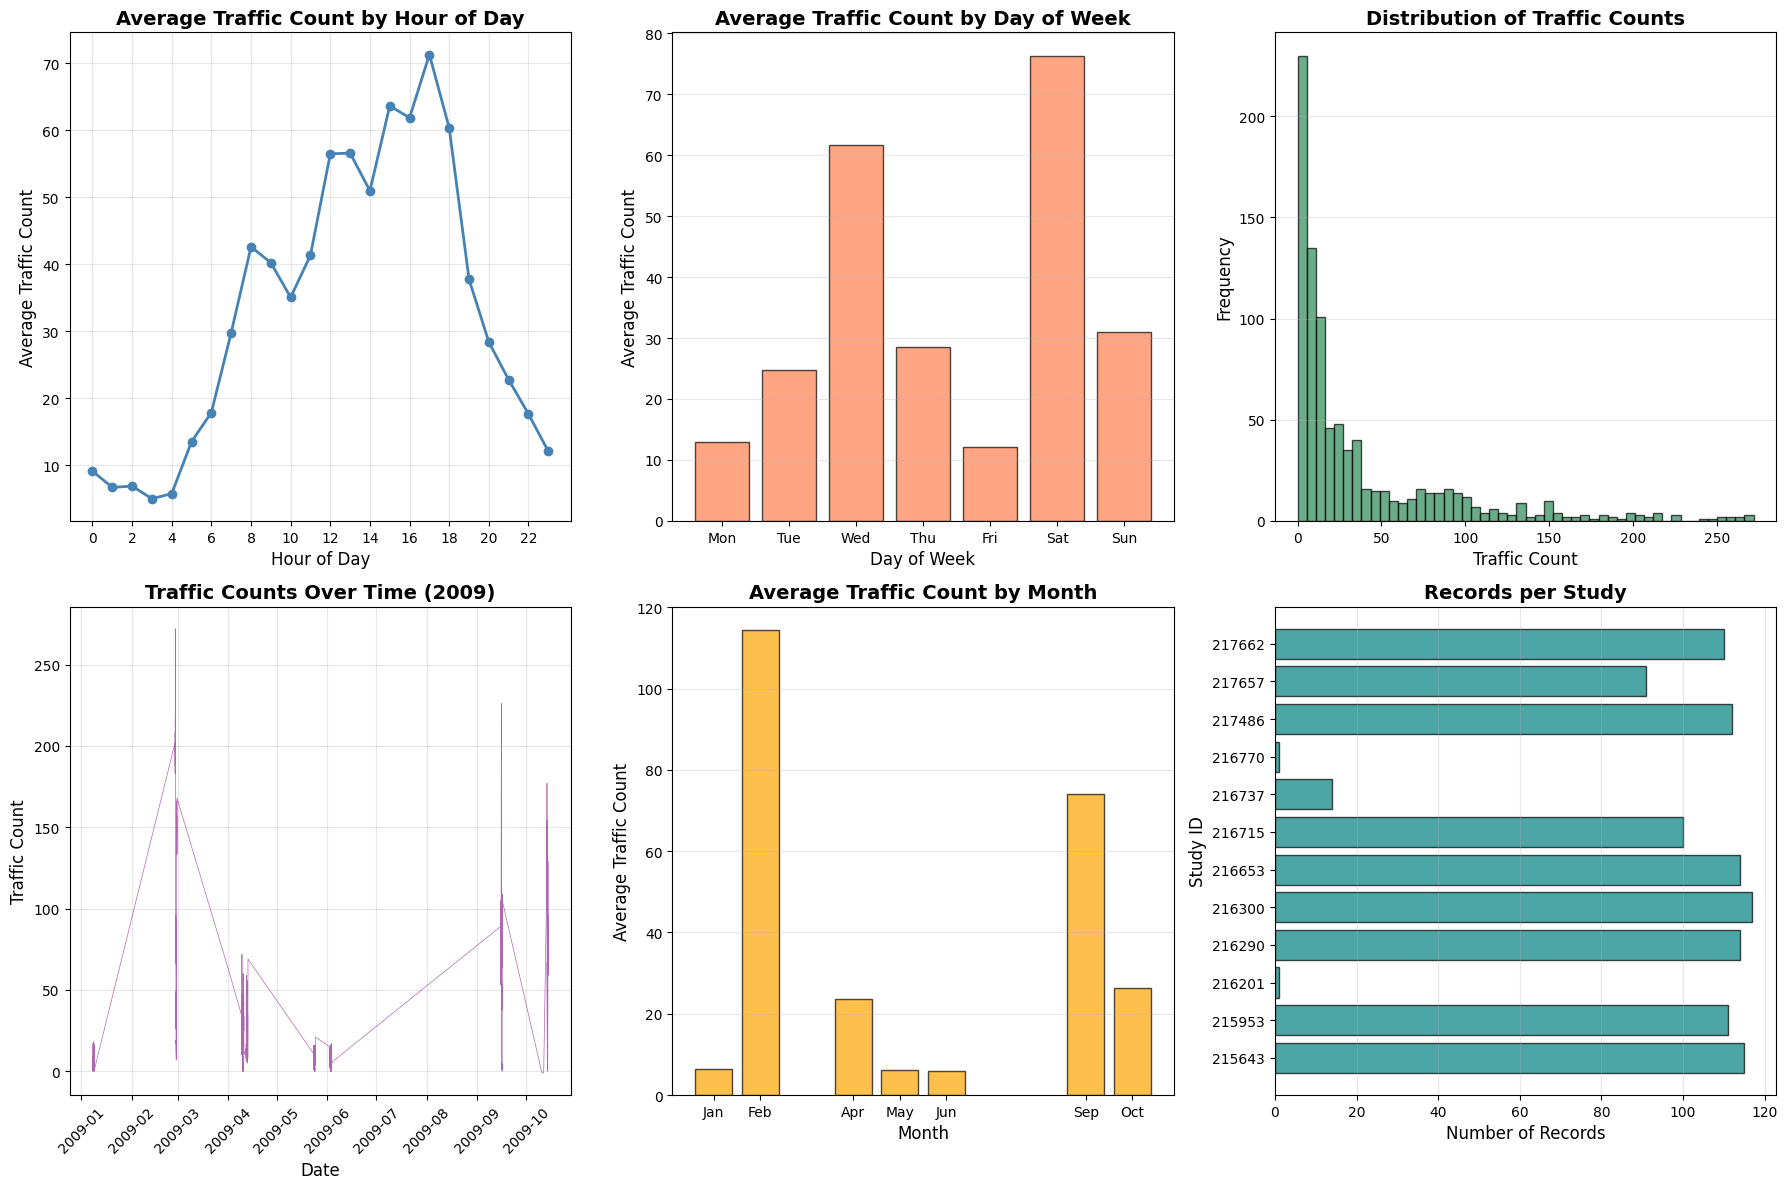


JSON DATA ANALYSIS SUMMARY

Dataset Overview:
  Total Records: 1,000
  Unique Studies: 12
  Date Range: 2009-01-07 to 2009-10-14
  Time Span: 279 days

Traffic Count Statistics:
  Mean: 38.5 vehicles
  Median: 15.0 vehicles
  Max: 272 vehicles
  Min: 0 vehicles
  Std Dev: 52.8

Temporal Patterns:
  Peak Hour: 17:00 (avg: 71.3 vehicles)
  Lowest Hour: 3:00 (avg: 5.0 vehicles)
  Busiest Day of Week: Sat (avg: 76.3 vehicles)
  Quietest Day of Week: Fri (avg: 12.1 vehicles)
  Busiest Month: Feb (avg: 114.5 vehicles)

Data Quality:
  Records with negative counts: 110 (11.0%)
  Records with zero counts: 54
  Records with valid counts (>0): 836


In [8]:
# Visualize the full multi-year 15-minute traffic count dataset
year_min = int(df_json_clean['count_year'].min())
year_max = int(df_json_clean['count_year'].max())

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'Seattle 15-Min Traffic Counts ({year_min}–{year_max})', fontsize=16, fontweight='bold', y=1.01)

# 1. Hourly profile (diurnal curve)
hourly_avg = df_json_clean.groupby('count_hour')['current_count'].mean()
axes[0, 0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Avg Count (per 15-min bin)')
axes[0, 0].set_title('Diurnal Traffic Profile')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# 2. Day-of-week pattern
weekday_avg = df_json_clean.groupby('count_week')['current_count'].mean().sort_index()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
present_days = weekday_avg.index.tolist()
axes[0, 1].bar(present_days, weekday_avg.values, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Avg Count (per 15-min bin)')
axes[0, 1].set_title('Traffic by Day of Week')
axes[0, 1].set_xticks(present_days)
axes[0, 1].set_xticklabels([weekday_names[d - 1] if 1 <= d <= 7 else str(d) for d in present_days])
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Distribution of counts
axes[0, 2].hist(df_json_clean['current_count'], bins=80, color='seagreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Traffic Count (per 15-min bin)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Count Distribution')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Time series scatter
df_sorted = df_json_clean.sort_values('datetime')
axes[1, 0].scatter(df_sorted['datetime'], df_sorted['current_count'], alpha=0.15, s=2, color='purple')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Traffic Count')
axes[1, 0].set_title(f'Counts Over Time ({year_min}–{year_max})')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Monthly pattern
monthly_avg = df_json_clean.groupby('count_month')['current_count'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_present = monthly_avg.index.tolist()
month_labels = [month_names[int(m) - 1] for m in months_present]
axes[1, 1].bar(months_present, monthly_avg.values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Avg Count (per 15-min bin)')
axes[1, 1].set_title('Traffic by Month')
axes[1, 1].set_xticks(months_present)
axes[1, 1].set_xticklabels(month_labels)
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Records per year
year_counts = df_json_clean['count_year'].value_counts().sort_index()
axes[1, 2].bar(year_counts.index, year_counts.values, color='teal', edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Number of Records')
axes[1, 2].set_title('Data Volume by Year')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "=" * 80)
print(f"ANALYSIS SUMMARY  —  {len(df_json_clean):,} records, {year_min}–{year_max}")
print("=" * 80)

valid = df_json_clean['current_count']
print(f"\nTraffic Counts (per 15-min bin):")
print(f"  Mean: {valid.mean():.1f}  |  Median: {valid.median():.1f}  |  Max: {valid.max():,}  |  Std: {valid.std():.1f}")

print(f"\nTemporal Patterns:")
print(f"  Peak hour: {int(hourly_avg.idxmax())}:00 (avg {hourly_avg.max():.1f})")
print(f"  Lowest hour: {int(hourly_avg.idxmin())}:00 (avg {hourly_avg.min():.1f})")
if len(present_days) >= 2:
    print(f"  Busiest day: {weekday_names[int(weekday_avg.idxmax()) - 1]} (avg {weekday_avg.max():.1f})")
    print(f"  Quietest day: {weekday_names[int(weekday_avg.idxmin()) - 1]} (avg {weekday_avg.min():.1f})")

print(f"\nCoverage:")
print(f"  Unique studies: {df_json_clean['study_id'].nunique():,}")
print(f"  Date range: {df_json_clean['datetime'].min().strftime('%Y-%m-%d')} → {df_json_clean['datetime'].max().strftime('%Y-%m-%d')}")
print(f"  Zero-count bins: {len(df_json_clean[df_json_clean['current_count'] == 0]):,}")


In [10]:
# Load and explore the Seattle traffic count data from 2018+
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Check if cached file exists, otherwise fetch from API
CACHE_FILE = "seattle_traffic_counts_2018plus.csv"
BASE_URL = "https://data.seattle.gov/resource/gi49-5uh6.json"
BATCH_SIZE = 50000
MAX_ROWS = 300000
MIN_YEAR = 2018

if os.path.exists(CACHE_FILE):
    df_traffic = pd.read_csv(CACHE_FILE)
    print(f"Loaded {len(df_traffic):,} cached records from {CACHE_FILE}")
else:
    print(f"Cache file not found. Fetching data from API...")
    all_records = []
    offset = 0

    while len(all_records) < MAX_ROWS:
        params = {
            "$limit": BATCH_SIZE,
            "$offset": offset,
            "$where": f"count_year >= {MIN_YEAR}",
            "$order": "count_id",
        }
        response = requests.get(BASE_URL, params=params, timeout=60)
        response.raise_for_status()
        batch = response.json()

        if not batch:
            break

        all_records.extend(batch)
        print(f"  Fetched batch at offset {offset:,}: {len(batch):,} rows  (total so far: {len(all_records):,})")
        offset += BATCH_SIZE

    df_traffic = pd.DataFrame(all_records)
    df_traffic.to_csv(CACHE_FILE, index=False)
    print(f"\n  Saved {len(df_traffic):,} records to {CACHE_FILE}")

# Display basic information about the dataset
print("\n" + "="*80)
print("Dataset Shape:", df_traffic.shape)
print("\n" + "="*80)
print("Column Names and Types:")
print(df_traffic.dtypes)
print("\n" + "="*80)
print("First few rows:")
print(df_traffic.head(10))
print("\n" + "="*80)
print("Basic Statistics:")
print(df_traffic.describe())
print("\n" + "="*80)
print("Missing Values:")
print(df_traffic.isnull().sum())
print("\n" + "="*80)
print("Unique values in key columns:")
for col in df_traffic.columns:
    n_unique = df_traffic[col].nunique()
    print(f"  {col}: {n_unique:,} unique values")

Loaded 300,000 cached records from seattle_traffic_counts_2018plus.csv

Dataset Shape: (300000, 13)

Column Names and Types:
count_id          int64
study_id          int64
count_sequence    int64
initial_count     int64
current_count     int64
count_year        int64
count_month       int64
count_day         int64
count_hour        int64
count_minute      int64
count_week        int64
add_dttm            str
mod_dttm            str
dtype: object

First few rows:
   count_id  study_id  count_sequence  initial_count  current_count  \
0  32147173    320924             344             48             71   
1  32147174    320924             345             33             66   
2  32147175    320924             346             27             48   
3  32147176    320924             347             32             28   
4  32147177    320924             348             21             25   
5  32147178    320924             349             30             21   
6  32147179    320924             3

In [11]:
# Convert data types and create datetime column for comprehensive analysis
df_traffic_clean = df_traffic.copy()

# Convert numeric columns
numeric_cols = ['count_id', 'study_id', 'count_sequence', 'initial_count',
                'current_count', 'count_year', 'count_month', 'count_day',
                'count_hour', 'count_minute', 'count_week']

for col in numeric_cols:
    df_traffic_clean[col] = pd.to_numeric(df_traffic_clean[col], errors='coerce')

# Create datetime column
df_traffic_clean['datetime'] = pd.to_datetime(
    df_traffic_clean[['count_year', 'count_month', 'count_day', 'count_hour', 'count_minute']].rename(
        columns={'count_year': 'year', 'count_month': 'month', 'count_day': 'day',
                 'count_hour': 'hour', 'count_minute': 'minute'}
    ),
    errors='coerce'
)

# Convert timestamp columns
df_traffic_clean['add_dttm'] = pd.to_datetime(df_traffic_clean['add_dttm'], errors='coerce')

# Filter out invalid records (negative counts, missing datetime)
rows_before = len(df_traffic_clean)
df_traffic_clean = df_traffic_clean.dropna(subset=['datetime'])
df_traffic_clean = df_traffic_clean[df_traffic_clean['current_count'] >= 0]
rows_after = len(df_traffic_clean)

print("=" * 80)
print("DATA CLEANING SUMMARY")
print("=" * 80)
print(f"Original records: {rows_before:,}")
print(f"Records removed: {rows_before - rows_after:,} ({(rows_before - rows_after) / rows_before * 100:.1f}%)")
print(f"Clean records: {rows_after:,}")

print("\n" + "=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Date range: {df_traffic_clean['datetime'].min()} → {df_traffic_clean['datetime'].max()}")
print(f"Time span: {(df_traffic_clean['datetime'].max() - df_traffic_clean['datetime'].min()).days} days")
print(f"Unique studies: {df_traffic_clean['study_id'].nunique():,}")
print(f"Years covered: {sorted(df_traffic_clean['count_year'].unique())}")

print("\n" + "=" * 80)
print("TRAFFIC COUNT STATISTICS (per 15-min bin)")
print("=" * 80)
print(f"Mean: {df_traffic_clean['current_count'].mean():.1f} vehicles")
print(f"Median: {df_traffic_clean['current_count'].median():.1f} vehicles")
print(f"Std Dev: {df_traffic_clean['current_count'].std():.1f} vehicles")
print(f"Min: {df_traffic_clean['current_count'].min():.0f} vehicles")
print(f"Max: {df_traffic_clean['current_count'].max():,.0f} vehicles")
print(f"25th percentile: {df_traffic_clean['current_count'].quantile(0.25):.0f} vehicles")
print(f"75th percentile: {df_traffic_clean['current_count'].quantile(0.75):.0f} vehicles")

print("\n" + "=" * 80)
print("RECORDS BY YEAR")
print("=" * 80)
print(df_traffic_clean['count_year'].value_counts().sort_index())

print("\n" + "=" * 80)
print("SAMPLE OF CLEANED DATA")
print("=" * 80)
print(df_traffic_clean.head(10))

DATA CLEANING SUMMARY
Original records: 300,000
Records removed: 3 (0.0%)
Clean records: 299,997

DATASET OVERVIEW
Date range: 2018-01-02 09:15:00 → 2019-04-30 10:00:00
Time span: 483 days
Unique studies: 447
Years covered: [np.int64(2018), np.int64(2019)]

TRAFFIC COUNT STATISTICS (per 15-min bin)
Mean: 69.9 vehicles
Median: 36.0 vehicles
Std Dev: 101.5 vehicles
Min: 0 vehicles
Max: 1,499 vehicles
25th percentile: 10 vehicles
75th percentile: 87 vehicles

RECORDS BY YEAR
count_year
2018    297981
2019      2016
Name: count, dtype: int64

SAMPLE OF CLEANED DATA
   count_id  study_id  count_sequence  initial_count  current_count  \
0  32147173    320924             344             48             71   
1  32147174    320924             345             33             66   
2  32147175    320924             346             27             48   
3  32147176    320924             347             32             28   
4  32147177    320924             348             21             25   
5  321

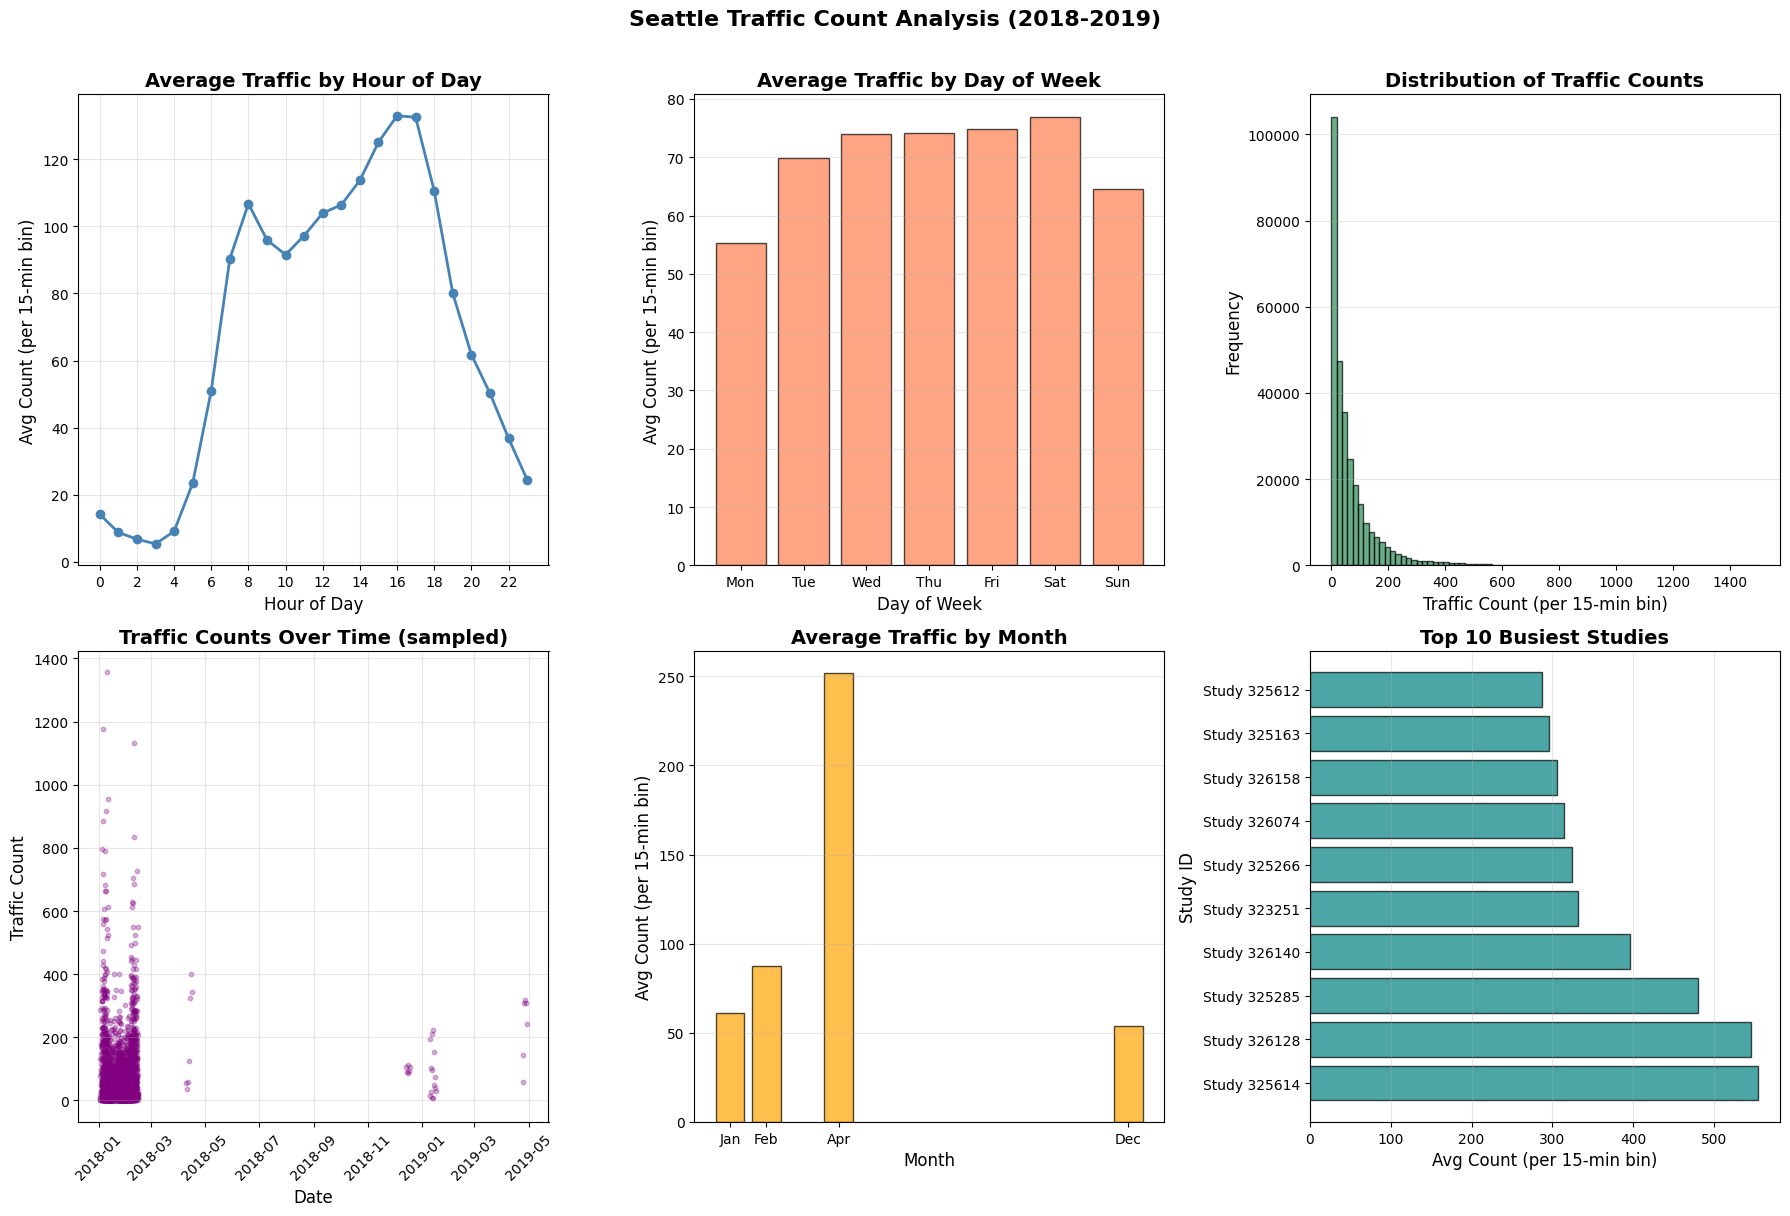


COMPREHENSIVE ANALYSIS SUMMARY - Seattle Traffic Counts (2018-2019)

Dataset Overview:
  Total Records: 299,997
  Unique Studies: 447
  Date Range: 2018-01-02 to 2019-04-30
  Time Span: 483 days

Traffic Count Statistics (per 15-min bin):
  Mean: 69.9 vehicles
  Median: 36.0 vehicles
  Std Dev: 101.5 vehicles
  Min: 0 vehicles
  Max: 1,499 vehicles
  25th percentile: 10 vehicles
  75th percentile: 87 vehicles

Temporal Patterns:
  Peak Hour: 16:00 (avg 132.9 vehicles)
  Lowest Hour: 3:00 (avg 5.4 vehicles)
  Busiest Day: Sat (avg 76.9 vehicles)
  Quietest Day: Mon (avg 55.3 vehicles)
  Busiest Month: Apr (avg 251.6 vehicles)
  Quietest Month: Dec (avg 53.7 vehicles)

Data Quality:
  Zero-count records: 9,723 (3.2%)
  Records with counts > 500: 2,836 (0.9%)

Key Insights:
  1. Traffic peaks during evening rush hour (16:00)
  2. Sat has the highest average traffic
  3. Traffic is lowest during early morning hours (3:00)
  4. The distribution is right-skewed (median < mean), indicating o

In [12]:
# Create comprehensive visualizations of Seattle traffic patterns (2018+)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Seattle Traffic Count Analysis (2018-2019)', fontsize=16, fontweight='bold', y=1.01)

# 1. Hourly traffic pattern (diurnal curve)
hourly_avg = df_traffic_clean.groupby('count_hour')['current_count'].mean()
axes[0, 0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Avg Count (per 15-min bin)', fontsize=12)
axes[0, 0].set_title('Average Traffic by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# 2. Day-of-week pattern
weekday_avg = df_traffic_clean.groupby('count_week')['current_count'].mean().sort_index()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar(weekday_avg.index, weekday_avg.values, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Avg Count (per 15-min bin)', fontsize=12)
axes[0, 1].set_title('Average Traffic by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(weekday_avg.index)
axes[0, 1].set_xticklabels([weekday_names[int(d)-1] for d in weekday_avg.index])
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Distribution of traffic counts
axes[0, 2].hist(df_traffic_clean['current_count'], bins=80, color='seagreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Traffic Count (per 15-min bin)', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].set_title('Distribution of Traffic Counts', fontsize=14, fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Time series - sample of data (too many points to plot all)
df_sample = df_traffic_clean.sort_values('datetime').iloc[::100]
axes[1, 0].scatter(df_sample['datetime'], df_sample['current_count'], alpha=0.3, s=10, color='purple')
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].set_ylabel('Traffic Count', fontsize=12)
axes[1, 0].set_title('Traffic Counts Over Time (sampled)', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Monthly pattern
monthly_avg = df_traffic_clean.groupby('count_month')['current_count'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_labels = [month_names[int(m)-1] for m in monthly_avg.index]
axes[1, 1].bar(monthly_avg.index, monthly_avg.values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Avg Count (per 15-min bin)', fontsize=12)
axes[1, 1].set_title('Average Traffic by Month', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(monthly_avg.index)
axes[1, 1].set_xticklabels(month_labels)
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Top 10 busiest studies
top_studies = df_traffic_clean.groupby('study_id')['current_count'].mean().nlargest(10)
axes[1, 2].barh(range(len(top_studies)), top_studies.values, color='teal', edgecolor='black', alpha=0.7)
axes[1, 2].set_yticks(range(len(top_studies)))
axes[1, 2].set_yticklabels([f'Study {int(sid)}' for sid in top_studies.index])
axes[1, 2].set_xlabel('Avg Count (per 15-min bin)', fontsize=12)
axes[1, 2].set_ylabel('Study ID', fontsize=12)
axes[1, 2].set_title('Top 10 Busiest Studies', fontsize=14, fontweight='bold')
axes[1, 2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print comprehensive summary
print("\n" + "="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY - Seattle Traffic Counts (2018-2019)")
print("="*80)

print(f"\nDataset Overview:")
print(f"  Total Records: {len(df_traffic_clean):,}")
print(f"  Unique Studies: {df_traffic_clean['study_id'].nunique():,}")
print(f"  Date Range: {df_traffic_clean['datetime'].min().strftime('%Y-%m-%d')} to {df_traffic_clean['datetime'].max().strftime('%Y-%m-%d')}")
print(f"  Time Span: {(df_traffic_clean['datetime'].max() - df_traffic_clean['datetime'].min()).days} days")

print(f"\nTraffic Count Statistics (per 15-min bin):")
print(f"  Mean: {df_traffic_clean['current_count'].mean():.1f} vehicles")
print(f"  Median: {df_traffic_clean['current_count'].median():.1f} vehicles")
print(f"  Std Dev: {df_traffic_clean['current_count'].std():.1f} vehicles")
print(f"  Min: {df_traffic_clean['current_count'].min():.0f} vehicles")
print(f"  Max: {df_traffic_clean['current_count'].max():,.0f} vehicles")
print(f"  25th percentile: {df_traffic_clean['current_count'].quantile(0.25):.0f} vehicles")
print(f"  75th percentile: {df_traffic_clean['current_count'].quantile(0.75):.0f} vehicles")

print(f"\nTemporal Patterns:")
print(f"  Peak Hour: {int(hourly_avg.idxmax())}:00 (avg {hourly_avg.max():.1f} vehicles)")
print(f"  Lowest Hour: {int(hourly_avg.idxmin())}:00 (avg {hourly_avg.min():.1f} vehicles)")
print(f"  Busiest Day: {weekday_names[int(weekday_avg.idxmax())-1]} (avg {weekday_avg.max():.1f} vehicles)")
print(f"  Quietest Day: {weekday_names[int(weekday_avg.idxmin())-1]} (avg {weekday_avg.min():.1f} vehicles)")
print(f"  Busiest Month: {month_names[int(monthly_avg.idxmax())-1]} (avg {monthly_avg.max():.1f} vehicles)")
print(f"  Quietest Month: {month_names[int(monthly_avg.idxmin())-1]} (avg {monthly_avg.min():.1f} vehicles)")

print(f"\nData Quality:")
print(f"  Zero-count records: {len(df_traffic_clean[df_traffic_clean['current_count'] == 0]):,} ({len(df_traffic_clean[df_traffic_clean['current_count'] == 0])/len(df_traffic_clean)*100:.1f}%)")
print(f"  Records with counts > 500: {len(df_traffic_clean[df_traffic_clean['current_count'] > 500]):,} ({len(df_traffic_clean[df_traffic_clean['current_count'] > 500])/len(df_traffic_clean)*100:.1f}%)")

print(f"\nKey Insights:")
print(f"  1. Traffic peaks during evening rush hour ({int(hourly_avg.idxmax())}:00)")
print(f"  2. {weekday_names[int(weekday_avg.idxmax())-1]} has the highest average traffic")
print(f"  3. Traffic is lowest during early morning hours ({int(hourly_avg.idxmin())}:00)")
print(f"  4. The distribution is right-skewed (median < mean), indicating occasional high-traffic events")
print(f"  5. Data spans {(df_traffic_clean['datetime'].max() - df_traffic_clean['datetime'].min()).days} days across {df_traffic_clean['study_id'].nunique():,} different study locations")
